## Playground

In [1]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [46]:
mesh_file = "C:\\Users\\amanc\\OneDrive\\Desktop\\Spring_2024\\research\\src\\viewpointPlaygroundEnv\\meshes\\stanford_bunny.obj"

In [47]:
mesh = o3d.io.read_triangle_mesh(mesh_file)
mesh = o3d.t.geometry.TriangleMesh.from_legacy(mesh)

In [48]:
scene = o3d.t.geometry.RaycastingScene()
scene.add_triangles(mesh)

0

In [53]:
in_mat = np.array([[300, 0, 160],
                   [0, 300, 120],
                   [0, 0, 1]])



pose = [0, 0, 0.45, 0, 0, 0]
# Use pose to create extrinsic matrix
ex_mat = np.eye(4)
ex_mat[:3, 3] = pose[:3]
ex_mat[:3, :3] = o3d.geometry.get_rotation_matrix_from_xyz(pose[3:6])

rays = scene.create_rays_pinhole(intrinsic_matrix=in_mat,
                                extrinsic_matrix = ex_mat,    
                                width_px=320,
                                height_px=240)

ans = scene.cast_rays(rays)

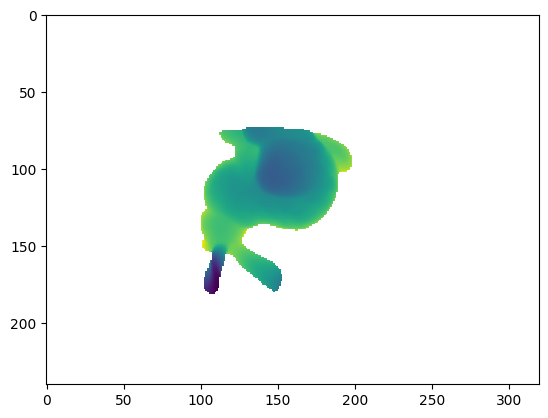

In [54]:
plt.imshow(ans['t_hit'].numpy())

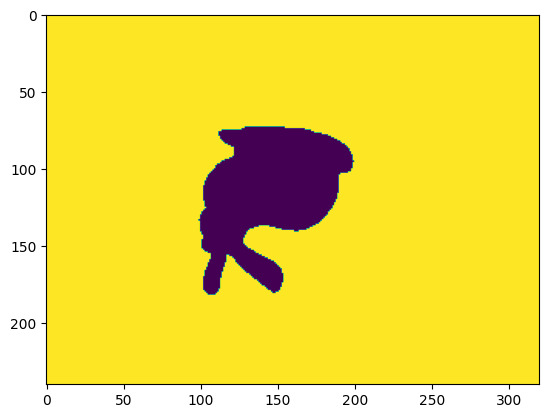

In [65]:
geometry_ids = ans['geometry_ids'].numpy()
plt.imshow(geometry_ids)

[[4294967295 4294967295 4294967295 ... 4294967295 4294967295 4294967295]
 [4294967295 4294967295 4294967295 ... 4294967295 4294967295 4294967295]
 [4294967295 4294967295 4294967295 ... 4294967295 4294967295 4294967295]
 ...
 [4294967295 4294967295 4294967295 ... 4294967295 4294967295 4294967295]
 [4294967295 4294967295 4294967295 ... 4294967295 4294967295 4294967295]
 [4294967295 4294967295 4294967295 ... 4294967295 4294967295 4294967295]]


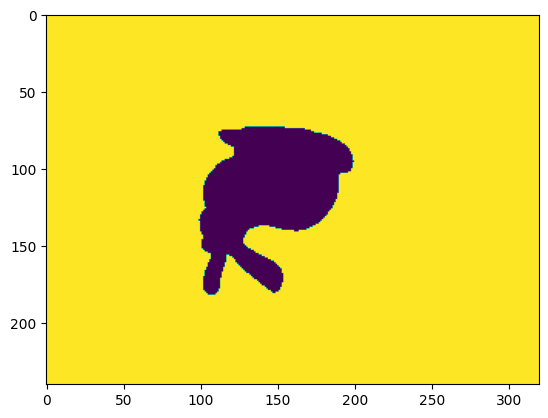

In [67]:
primitive_ids = ans['primitive_ids'].numpy()
plt.imshow(primitive_ids)
print(primitive_ids)

In [69]:
INVALID_ID = 4294967295

# Reshape primitive_ids to a 1D array
primitive_ids = primitive_ids.reshape(-1)
# Remove all the invalid IDs
primitive_ids = primitive_ids[primitive_ids != INVALID_ID]

primitive_ids = np.unique(primitive_ids)
print(len(primitive_ids))

1796


In [78]:
# get the toal number of triangles in the mesh
num_triangles = mesh.triangle.indices.shape[0]
print(num_triangles)

# percentage of triangles hit
percentage = len(primitive_ids) / num_triangles
print(percentage)

4968
0.3615136876006441


## Environment Prototype

In [80]:
# Bring the mesh to the origin
mesh.translate(-mesh.get_center())

TriangleMesh on CPU:0 [2503 vertices (Float32) and 4968 triangles (Int64)].
Vertex Attributes: normals (dtype = Float32, shape = {2503, 3}).
Triangle Attributes: None.

In [118]:
# Extract bounding box
bbox = mesh.get_axis_aligned_bounding_box()
bbox_low = bbox.min_bound.numpy()
bbox_high = bbox.max_bound.numpy()
# COnvert to list
print(bbox_low, bbox_high)

[-0.06634428 -0.06090553 -0.07072856] [0.08881471 0.09278047 0.04966545]


In [363]:
import gymnasium as gym

# Create an action space.
low = bbox_low - 0.1
high = bbox_high + 0.1
# Add the rotation limits
# low = np.concatenate([low, [-np.pi, -np.pi, -np.pi]])
# high = np.concatenate([high, [np.pi, np.pi, np.pi]])
print(low, high)

action_space = gym.spaces.Box(low=low, high=high, dtype=np.float32) 

[-0.16634429 -0.16090553 -0.17072856] [0.18881471 0.19278046 0.14966545]


[-0.15817367  0.05263609 -0.11435418]
0.32588566827697263


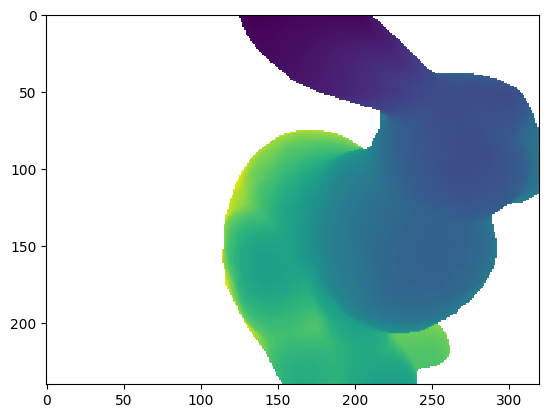

In [397]:
action = action_space.sample()

print(action)

in_mat = np.array([[300, 0, 160],
                   [0, 300, 120],
                   [0, 0, 1]])



pose = action
# Use pose to create extrinsic matrix
# ex_mat = np.eye(4)
# ex_mat[:3, 3] = pose
# Find the rotation 

# rays = scene.create_rays_pinhole(intrinsic_matrix=in_mat,
#                                 extrinsic_matrix = ex_mat,    
#                                 width_px=320,
#                                 height_px=240)

rays = scene.create_rays_pinhole(fov_deg=60,
                                center = [0,0,0],
                                eye = pose,
                                up = [0,-1,0],
                                width_px=320,
                                height_px=240) 


ans = scene.cast_rays(rays)

plt.imshow(ans['t_hit'].numpy())

primitive_ids = ans['primitive_ids'].numpy()
# Reshape primitive_ids to a 1D array
primitive_ids = primitive_ids.reshape(-1)
# Remove all the invalid IDs
primitive_ids = primitive_ids[primitive_ids != INVALID_ID]
primitive_ids = np.unique(primitive_ids)

percentage = len(primitive_ids) / num_triangles
print(percentage)


## Environment Testing

In [1]:
import open3d as o3d
from viewpointWorld import CoverageEnv
import matplotlib.pyplot as plt

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
env = CoverageEnv(save_action_history=True)
env.reset()

(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), {})

0
[0.07059644 0.03606855 0.07329625]
Agent pose: [0.07059644 0.03606855 0.07329625]
Count 1
Reward: -1000.0
Covered in current step: 14.070048309178743%
Total Percentage covered: 14.070048309178743% 

1
[ 0.04604247 -0.13635495  0.02218933]
Agent pose: [ 0.04604247 -0.13635495  0.02218933]
Count 2
Reward: -2000.0
Covered in current step: 14.150563607085346%
Total Percentage covered: 27.375201288244767% 

2
[-0.02795693  0.03197842  0.03692463]
Invalid action requested...
Count 2
Reward: -2000.0
Covered in current step: 0.0%
Total Percentage covered: 27.375201288244767% 

3
[-0.00432277 -0.15706502 -0.11342338]
Agent pose: [-0.00432277 -0.15706502 -0.11342338]
Count 3
Reward: -3000.0
Covered in current step: 35.36634460547504%
Total Percentage covered: 54.247181964573265% 

4
[0.04548605 0.15782541 0.01092836]
Agent pose: [0.04548605 0.15782541 0.01092836]
Count 4
Reward: -4000.0
Covered in current step: 24.114331723027373%
Total Percentage covered: 63.949275362318836% 

5
[-0.1232749  

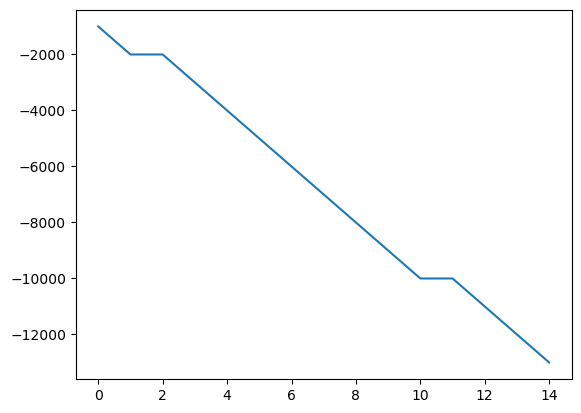

In [3]:
env.reset()

done = False
counter = 0
reward_list = []    
while not done:
    print(counter)
    counter += 1
    action = env.action_space.sample()
    print(action)
    _ , reward, done, _, _ = env.step(action)
    reward_list.append(reward)

#plot the reward
plt.plot(reward_list)

In [4]:
env.save_action_history = True
env.close()

Saving the action history...
